# Week 4 : Lab 
 ## Data structures: Lists, sorting and tuples
 ##### CS1P - University of Glasgow - John Williamson - 2016

In [ ]:
from __future__ import division   # make division work like Python 3.x
## Remember to run this cell; the exercises rely on it!


## Lab exercise

**You must submit a reasonble attempt at this exercise to gain a tick for this work**.

<font color="red"> Remember to save your work frequently! </font>



## Purpose of this lab

This lab will get you up to speed on using lists in Python programs, including joining lists, removing and adding elements, copying lists, sorting and shuffling. You will need to synthesise the ideas from the lecture into some  larger problems.



## Before the lab
* Attempt at least the A exercises.
* Read Ch 8.1 to 8.15 (pp. 81-91) in "How to Think Like a Computer Scientist". 

### If you're confused about tuples:
* Read the blog article [lists versus tuples](http://nedbatchelder.com/blog/201608/lists_vs_tuples.html) by Ned Batchelder.


## A: Quick problems
These should take around 5 minutes each.

### A.1 Simple list operations
You are given three lists `x,y,z`.

Write code that will:
* join the lists in the order `z,x,y`, 
* then remove the 3rd element of the list.
* Store the result in a variable `zxy`. 
* Create a *copy* of `zxy` and call it `zxy_copy`. 
* Add the string `"in the sunshine"` to the end of `zxy_copy`.

In [18]:
# These are the lists you are given
x = [1,2,3]
y = [0,0,0]
z = [1,9,6,9]

In [29]:
# Solution goes here
zxy = z +  x + y
del zxy[2]
zxy_copy = zxy[:]
zxy_copy.append("in the sunshine")
print zxy
print zxy_copy

[1, 9, 9, 1, 2, 3, 0, 0, 0]
[1, 9, 9, 1, 2, 3, 0, 0, 0, 'in the sunshine']


In [30]:
## Test (make sure your variable is called zxy!)
assert(zxy==[1,9,9,1,2,3,0,0,0])
assert(zxy_copy==[1,9,9,1,2,3,0,0,0,"in the sunshine"])
assert(zxy is not zxy_copy)
print "All OK"

All OK


### A.2 Colours
**Without using a loop**, using the following definition of **colours**, print out the following:
1. The first element of  `colours`
1. The last element of `colours`
1. Every even element of `colours` (i.e. elements with even indices)
1. Every odd element of `colours`
1. The third to the sixth element of `colours` (be careful to include the sixth element)
1. The last five elements of colours
1. Every third element of the first 8 elements of `colours`, in reverse order.


In [63]:
colours = ["red", "black", "orange", "yellow", "blue", "cyan", "green", "purple", "gray", "white"]

red
white
['red', 'orange', 'blue', 'green', 'gray']
['black', 'yellow', 'cyan', 'purple', 'white']
['orange', 'yellow', 'blue', 'cyan']
['cyan', 'green', 'purple', 'gray', 'white']
['purple', 'blue', 'black']


In [12]:
# Solution goes here
print colours[0]
print colours[9]
print colours[::2]
print colours[1::2]
print colours[2:6]
print colours[-5:]
print colours[-3::-3]

### A.3 Joining and removing
Write a function `unique_elts()` that takes two lists, and returns a new list with the elements that appeared in *only one of the lists* (i.e. remove items that appeared in both).

In [4]:
# Solution goes here
def unique(listA,listB):
    l =[]
    for i in range(len(listA)):
        if listA[i] not in listB:
            l.append(listA[i])
    return l

def unique_elts(list1,list2):
    final_list = []   
    l1 = unique(list1,list2)
    l2 = unique(list2,list1)
    final_list = l1+l2
    return final_list


In [7]:
## Tests
## If you run this cell, it should print "All OK"
## Otherwise, you'll see which of the lines caused the problem
assert(unique_elts([1,2,3],[2,3]) == [1])
assert(unique_elts(["five"],["five"]) == [])
assert(unique_elts([],[1,2,3]) == [1,2,3])
assert(unique_elts(["a","b","c"],[1,2,3]) == ["a","b","c",1,2,3])
print "All OK"


All OK


### A.4 Nesting
Write a function `nest(x,n)` which takes a value `x` and a number `n` and puts the value `x` inside a list, then puts that list inside a list, and so on, up to `n` levels, for any non-negative `n`. Putting one list inside another is called **nesting**.

For example:

    nest("hello",0)  = "hello"     # n=0 does nothing
    nest("hello",1)  = ["hello"]   # n=1 puts it in a list
    nest("hello",4)  = [[[["hello"]]]] # n=4 puts inside a list inside a list inside ...
        

In [23]:
# Solution goes here
def nest(x,n):
    if n ==0 :
        return x
    
    nest_list = [x]
    
    for i in range(n-1):
        nest_list = [nest_list]
    return nest_list


In [24]:
## Tests
assert(nest("hello",0)=="hello")
assert(nest("hello",1)==["hello"])
assert(nest("hello",5)==[[[[["hello"]]]]])
print "All OK"

All OK


### A.5 Adding the length
Write a function `add_length(l)` which takes a list `l` and then appends the length of the list as the last element. **Don't use a return statement to return the list**. 

Think about what being able to change a list **in place** means about transferring values from functions back into the calling code.

Check that your function does what you think it does.


In [77]:
# Solution goes here
def add_length(List):
    List.append(len(List))

In [78]:
# this will work.
x = ["a", "b", "c"]
add_length(x)
print x

# Question: why doesn't this work?
print add_length([1,2,3])

['a', 'b', 'c', 3]
None


In [79]:
## Tests
l = [1,2,3]
assert(add_length(l)==None)
assert(l==[1,2,3,3])
add_length(l)
assert(l==[1,2,3,3,4])
l = []
add_length(l)
assert(l==[0])
print "All OK"

All OK


--------------
## B: List Problems
These should take 30-45 minutes each.

### A slightly dodgy new startup: <font color="green"> myshopfastr.com </font>
You're writing an app to help people shop more efficiently in the supermarket (for people who still go to physical shops).
There are several bits of functionality to implement: the ability to search for items easily (e.g. "celery" might return "Sainsbury's Organic Celery 100g, ...") and the ability to show the user results as a list of options:

     Sainsbury's Organic Celery 100g, £2.99, 100g, £0.30, B3
     Sainsbury's Celery 100g, £1.99, 100g, £0.20, A1
     Sainsbury's Basic Celery 50g, £0.39, 50g, £0.08, A1
     Sainsbury's Extremely Basic Celery, £0.10, 50g, £0.02, A4     
     ...
     

You also need to convince investors that your design choices are making the app better.     

-------------     

### B.1: Stopping and stemming
Search engines like Google often need to "clean up" search queries (the query is the thing you type into a search box) before trying to find terms (words) in documents. 

For example "what is the fastest python list iterator" might be transformed into keywords `["python", "list", "fast", "iterator"]`. In our example, we'd like users who think the computer is a person and type in things like "find me the apples" to be transformed to `["apple"]`, removing the extraneous parts of the search query.

There are two parts to this: **stopword** removal, which removes short, uninformative words like "the" and "and"; and **stemming** which removes common endings like "ing" and "s" to find the basic form of a word. Here we'll "stem" by just chopping off any bits of words that match common endings.

For this problem, you need to write a bit of code to first remove **stopwords** and then **stem** the remaining words. Try getting the stopword removal working first, then go on to the stemming.

Steps:
1. Create your own list of common stop words (e.g. ["and", "to", "the", ...])
2. Create your own list of common English endings (e.g. ["ing", "ings", "s", "er", "tion"])
3. Get user input.
4. Split the input into words. You can use `my_string.split()` to split a string `my_list` up into a list of individual words.
5. Remove all of the words in the stopwords from the user input.
6. For each word, test if the word ends in one of the common endings, and if it does, remove the ending. 
7. Print out the cleaned up search terms.

Note that you can use `.endswith()` on a string to test if the string ends with those characters. You can join a list of strings back together using `join()`, but the syntax is slightly unexpected: see below for how to use it.

**Note that the rules to make stemming really work well for English are annoyingly complicated. Don't worry if your simple stemmer doesn't do a very sensible job (e.g. "Sting" becomes "St"!)**

Read the little code examples below to see how to use thre string functions mentioned above.

In [1]:
# an endswith() example
# simply returns True if the string ends with the given string
# unsuprisingly, there is a .startswith() as well.
print "running".endswith("ing")
print "running".endswith("tion")

True
False


In [ ]:
# how split() can be used to split a string up
# you can actually tell split what you want to use a separator between items (called *tokens*)
# if you don't give one, it defaults to spaces
print "this is a test".split()

In [10]:
# using join()
# this joins each word with a space inbetween
print " ".join(["one", "two", "three"])

one two three


In [6]:
# you can use any string to go in between
# but note that you call join() as a method of the
# the string you want to use as the separator, and pass
# the list to join as an argument
print "<->".join(["a", "b", "c"])

a<->b<->c


In [61]:
# Solution goes here
common = ["and", "to", "the", "is", "are", "who","what", "when", "where", "how"]
endings = ["ing", "ings", "s", "er", "tion"]
punctutation = ['.', ',','?', '!']

l = "Where is the cheese !"

l = l.split()

def remove_cap(l):
    for i in range(len(l)):
        l[i] = l[i].lower()
    return l
    
    

def remove_punc(l):
    cleaned_l = []
    for i in range(len(l)):                 
        for j in range(len(punctutation)):
                if l[i] == punctutation[j]:
                    break
                if j == (len(punctutation)-1):
                    cleaned_l.append(l[i])                 
    return cleaned_l
    

def remove_end(l):
    cleaned_l = l[:]
    
    for i in range(len(l)):                 
        for j in range(len(endings)):
                if l[i].endswith(endings[j]):
                    del cleaned_l[i]
                    ended = list(l[i])
                    ended = ended[:-(len(endings[i])-1)]
                    cleaned_l.append("".join(ended))
                    
    return cleaned_l
            
    
def remove_common(l, common = common):
    cleaned_l = []
    for i in range(len(l)):                 
        for j in range(len(common)):
                if l[i] == common[j]:
                    break
                if j == (len(common)-1):
                            cleaned_l.append(l[i])                 
    return cleaned_l
                
def clean_up(l):
    cleaned_l = []
    cleaned_l = remove_cap(l)
    cleaned_l = remove_punc(cleaned_l)
    cleaned_l = remove_end(cleaned_l)
    cleaned_l = remove_common(cleaned_l)
    cleaned_l = " ".join(cleaned_l)
    return cleaned_l

print l
print clean_up(l) 

['Where', 'is', 'the', 'cheese', '!']
!
cheese 


## Tests
The output you get will depend on what words you included in your `stopwords` list, and what stems you listed in the `stems` list.

For example, I'd expect
      
      where are the cheeses
to become
      
      cheese
      
and 

    for shoe polishing 
to become

    shoe polish

## Extension (OPTIONAL)

Work out how to remove any punctuation and make the search case-insensitive.


### B.2: Showing and sorting lists
For <font color="green"> myshopfastr.com </font>, the app has to display a list of items to the user on their phone. Each item has multiple attributes, like price, weight, calories, and aisle position.

Your task is (a) create the **data structure** which holds this information (b) be able to present this information flexibly; for example to show the items according to their price, or to order them by aisle to make checking them off as you go quicker.

We'll store the information as a list of lists: e.g. we might have

    [["Sainsbury's Organic Celery", 2.99, 100, "A1"], ["Sainsbury's Organic Peanut Butter", 2.49, 100, "C3"]...]

*NB: in practice a real system would be likely to use a **database** to store and sort this kind of information, but it would typically be returned to the app code as a list-of-lists.*

#### Using key()
You can sort a lists-of-lists just like any other list. What Python will do by default is sort by the first element of the "internal" lists. Try this example:

In [62]:
to_sort = [["b", "earth"],  ["c", "metal"], ["a", "fire"], ["d", "air"]]
# note that we will sort by the alphabetical order of the first element of the inner list
print sorted(to_sort)

[['a', 'fire'], ['b', 'earth'], ['c', 'metal'], ['d', 'air']]


But we need to able to sort by different attributes (e.g. by price or by aisle number). Python provides a parameter called `key` to tell `.sort()` or `sorted()` which element of the list to look at.

`key` takes a **function** which transforms the element before it is used to check the sort order. For example, we can make Python look at the second element of a list:

In [7]:
def second_elt(l):
    # remember that [1] means the second element.
    return l[1]

# now will be sorted by the ordering of the second element of the list
#print sorted(to_sort, key=second_elt)

## Task
You are given a set of lists of product data (below). 

1. Calculate a new list `weight_price`, with the price-per-weight for each shopping item.

1. Combine all of the lists of product data into a single list-of-lists `product_data` as described above. 

1. Write a function `sort_shopping(shopping_list, n)` that returns a sorted list of items, which takes a number `n` and sorts the products by that column.

1. Write a function that outputs each entry in the list on a new line, with each  attributed separated with the string `\t`. This will tabulate the list nicely. 


In [3]:
products = ["shampoo", "conditioner", "hair wax", "shoe polish", "shower gel", "basic celery"]
prices = [2.99, 2.99, 5.00, 2.99, 4.00, 1.00]
aisles = ["A1", "A2", "A2", "D4", "G3", "E1"]
weights = [800, 800, 200, 100, 50, 100]

In [52]:
# Solution goes here
n = 2
def priceperweights(weights, price):
    l = []
    for i in range(len(weights)):
        l.append(price[i]/weights[i])
    return l

def combine_lists(products,prices,aisles,weights):
    list_products = []
    priceperweight= priceperweights(weights, prices)
    for i in range(len(products)):
        list_products.append([products[i],prices[i],aisles[i],weights[i],priceperweight[i]])
    return list_products

def sort(l):
    return l[n]

def table(l):
    for i in range(len(l)):
        print "\n"
        print " \t %s \t %s \t %s \t %s \t %s" %(l[i][0], l[i][1], l[i][2], l[i][3], l[i][4]),


sorted_list = sorted(combine_lists(products,prices,aisles,weights),key=sort )
table(sorted_list)
   




 	 shampoo 	 2.99 	 A1 	 800 	 0.0037375 

 	 conditioner 	 2.99 	 A2 	 800 	 0.0037375 

 	 hair wax 	 5.0 	 A2 	 200 	 0.025 

 	 shoe polish 	 2.99 	 D4 	 100 	 0.0299 

 	 basic celery 	 1.0 	 E1 	 100 	 0.01 

 	 shower gel 	 4.0 	 G3 	 50 	 0.08


In [53]:
print_shopping(sort_shopping(product_data, 2))


NameError: name 'print_shopping' is not defined

## Tests
`print_shopping(sort_shopping(product_data, 4))`  should give:

    shampoo 	    2.99 	A1 	800 	0.0037375 	
    conditioner 	2.99 	A2 	800 	0.0037375 	
    basic celery 	1.0 	E1 	100 	0.01 	
    hair wax 	    5.0 	A2 	200 	0.025 	
    shoe polish 	2.99 	D4 	100 	0.0299 	
    shower gel 	  4.0 	G3 	50 	 0.08 	
    
    
`print_shopping(sort_shopping(product_data, 2))` should give:

    shampoo 	    2.99 	A1 	800 	0.0037375 	
    conditioner 	2.99 	A2 	800 	0.0037375 	
    hair wax 	    5.0 	A2 	200 	0.025 	
    shoe polish 	2.99 	D4 	100 	0.0299 	
    basic celery 	1.0 	E1 	100 	0.01 	
    shower gel 	  4.0 	G3 	50      0.08 	



### B.3: The bootstrap
Now that you're ready to deploy your "amazing" app, you've released a few different beta versions to test which sorting option works best as a default. Each user has rated the app with 1-5 stars. You are also the data scientist for the company, so you need to work out which version is better.

You have two big lists of the star ratings users gave. You want to know if "Version A" with sort-by-prices as default, or "Version B" with sort-by-aisle as default is going to be a bigger hit, or if it doesn't make any difference a tall. Those of you who have studied statistics will know specialized **statistical tests** that you can run to measure this. 

But there are simple tests you can do if you have a computer to do many repetitive calculations. We'll use a simple technique called the **bootstrap test** to see whether the two versions of the app are really different.

### Task
There are three steps to the bootstrap test:
1. Take a list of responses (here, the star ratings), then make a new list by **randomly drawing** elements from the original responses.  Elements from the original list can appear many times in the random list. The new random list must be the same length as the original list.
1. Measure some value (called a `statistic`) of the new random list; here we'd like the **average** (mean) rating of the app. 
1. Apply this random new list creation many times, computing the statistic (mean) of each one, and collecting together a list of the resulting statistics (means).

#### Coding steps
To write your code:
1. Write a function `mean(l)` computes the arithmetic mean of a list. This is our `statistic`.
2. Write a function `random_draws(l)`, which creates a new list and fills it with random choices from the first list `l`. The length of the random list should be the same length as the original list `l`. **Note that this is not a shuffle, because elements could appear multiple times in the new random list**. You can use `random.choice()` to select a random element from a list. 
3. Write a function `bootstrap(l, n)` which calls `random_draws()` on the list `l` and then computes the mean of the random list. It should do this *n* times and stores the results of the mean calculations in a list. There should be *n* mean calculations.

#### Tips
Remember that to use functions from `random`,  it must be imported with

    import random

at the start of your solution.

The code below the solution will run `bootstrap()` on the results for A and B and plot them -- you should be able to see clearly whether there is a difference or not. Try with version C as well (e.g. compare A and C)

In [87]:
# Solution goes here
import random

l = [8,2]

def mean(l):
    total = 0
    for i in range(len(l)):
        total += l[i]
    mean = total/len(l)
    return mean

def random_draws(l):
    final = []
    for i in range(len(l)):
        final.append(l[random.randint(0,(len(l)-1))])
    return final

def bootstrap(l, n):
    mean_list = []
    for i in range(n):
        ran_l = random_draws(l)
        mean_l=mean(ran_l)
        mean_list.append(mean_l)
    return mean_list
        
print bootstrap(l, 4)      
    

        

[2, 2, 5, 8]


In [86]:
## This is the raw data collected from the app. 
A = [1, 2, 4, 5, 1, 1, 3, 5, 5, 4, 1, 4, 1, 3, 3, 1, 5, 1, 1, 3, 3, 1, 2, 1, 5, 1, 5, 5, 2, 1, 3, 1, 1, 1, 2, 2, 1, 1, 5, 2, 3, 4, 1, 1, 3, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 3, 1, 1, 1, 1, 5, 1, 1, 4, 1, 5, 2, 4, 2, 2, 1, 3, 2, 2, 4, 1, 5, 1, 1, 5, 1, 1, 1, 3, 1, 1, 1, 4, 1, 3, 1, 1, 2, 1, 3, 1, 5, 3, 5, 2, 1, 1, 1, 2, 2, 1, 3, 3, 5, 2, 2, 1, 3, 1, 2, 1, 3, 1, 1, 5, 5, 1, 3, 5, 2, 1, 1, 1, 3, 3, 1, 1, 1, 4, 1, 1, 3, 1]
B = [5, 1, 1, 5, 5, 1, 4, 5, 5, 5, 1, 1, 5, 4, 5, 2, 1, 4, 2, 1, 1, 5, 5, 1, 5, 2, 1, 4, 2, 4, 1, 2, 1, 1, 5, 3, 3, 3, 4, 1, 1, 1, 1, 2, 4, 5, 1, 5, 5, 3, 4, 1, 5, 1, 4, 5, 1, 4, 1, 5, 1, 5, 2, 5, 5, 5, 1, 1, 1, 4, 3, 1, 1, 4, 5, 5, 5, 1, 1, 1, 5, 5, 5, 5, 1, 5, 1, 4, 1, 1, 1, 5, 4, 3, 1, 5, 2, 5, 1, 3, 4, 1, 1, 1, 3, 1, 1, 5, 5, 1, 2, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 4, 5, 1, 5, 1, 3, 4, 4, 1, 1, 5, 4, 5, 1, 5, 5, 2, 5, 5, 4, 5, 5, 1, 3, 1, 3, 2]

## We also have data from a version C, which has sort-by-weight as the default
C = [5, 1, 5, 1, 3, 1, 4, 2, 4, 5, 1, 1, 4, 1, 1, 1, 4, 4, 2, 1, 1, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 5, 5, 1, 2, 3, 2, 4, 1, 1, 3, 3, 1, 1, 2, 1, 1, 5, 2, 3, 1, 3, 3, 2, 1, 2, 2, 1, 1, 5, 3, 1, 1, 3, 1, 1, 5, 1, 1, 1, 3, 4, 2, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 3, 4, 2, 4, 1, 1, 5, 1, 4, 3, 5, 1, 1, 1, 5, 1, 5, 4, 1, 1, 5, 1, 1, 1, 1, 5, 2, 4, 1, 1, 3, 1, 1, 5, 1, 3, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 3, 5, 5, 1, 1, 4, 1, 5, 3, 1, 1, 3, 2]

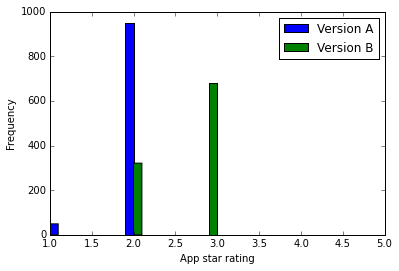

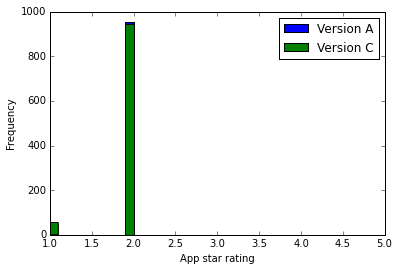

In [88]:
## This code just plots a histogram of the values of the results
## If the curves overlap a lot, then the difference probably
## is not meaningful

import matplotlib.pyplot as plt
%matplotlib inline

### Plot A versus B

## plot histograms
plt.hist(bootstrap(A,1000), bins=10)
plt.hist(bootstrap(B,1000), bins=10)
plt.xlim(1,5)

## data scientists always label their graphs!
plt.xlabel("App star rating")
plt.ylabel("Frequency")
plt.legend(["Version A", "Version B"])

### Plot A versus C
plt.figure()

## plot histograms
plt.hist(bootstrap(A,1000), bins=10)
plt.hist(bootstrap(C,1000), bins=10)
plt.xlim(1,5)

## data scientists always label their graphs!
plt.xlabel("App star rating")
plt.ylabel("Frequency")
plt.legend(["Version A", "Version C"])



**If you managed this: Great! Now you have some pretty graphs show the venture capitalists and get another funding round sorted out :) **


## (Optional) Further questions
If you're interested:
* Try plotting the histogram of the  original app ratings (e.g. `plt.hist(A, bins=10)`). Why is this not very helpful, whereas the bootstrap result is easy to interpret? 
* What happens if the bootstrap value is very small (e.g. bootstrap(A,2))? 
* Or very large?

---------

## C: Extended problems (OPTIONAL)
These *extended* problems are optional for students who are keen to learn more. If you've finished the whole lab and want to explore these ideas in more depth, these problems and resources are intended to help you do that. 

## <font color="red"> You do not need to make any attempt at any of this section to receive a tick! </font>

These will take 30-60 minutes each.

### C.1 Function lists
You can put anything that you can put in a variable in a Python list. This includes functions. 

For example, imagine you had to build a little command set to drive a robot. But the robot's remote control unit can only send a numerical code for each function to be executed (e.g. 0=go forward, 1=turn left). 

If you put functions that did these operations in a list you can just index them and call them:

In [307]:
def forward():
    print "forward"
    
def left():
    print "left"
    
def right():    
    print "right"
    
    
# note that there is no following () after the functions
# so they are not called, but instead a reference to them is put in the list
fn_list = [forward, left, right]

# this takes the first element of fn_list, then calls it using ()
fn_list[0]()

fn_list[1]()
fn_list[0]()
fn_list[0]()
fn_list[2]()


### Task
Write a set of functions for the following commands, for a robot moving in 2D space (x and y) and put them in a list so that we have:

    0: move forward by 1 unit, drawing a line from the previous position to the new one
    1: turn left; make the new direction 60 degrees left of the previous
    2: turn right; make the new direction 60 degrees right of the previous
    3: remember; remember where we are and where we are facing;
    4: return; return to the last place we remembered and remove it from the remembered list.
    
To do this, you will need to store where the robot currently is in 2D (hint: a list consisting of an x and y co-ordinate) and what way the robot is facing. Start with the robot facing upwards at position (0,0). Use a vector (dx,dy) to represent the direction the robot faces.

You will also need to keep a list of places that have been remembered (and the direction the robot was facing) by command 3, and be able to return to them with command 4. Command 4 should also remove the remembered location from the list of  remembered locations (hint: how could you use `del` to do this?).

Write a function `simulate()` to apply these commands to a list of numbers 0-4 and simulate the robot's movement.

### Tips

The command `line(ox,oy,x,y)` defined below will draw a line from (ox,oy) to (x,y).  The function `rotate()` to rotate a direction vector by a given angle is provided for you.


        

In [154]:
import math

def rotate(dx, dy, angle=60):
    """Takes a direction dx,dy and returns a new direction (dx_new, dy_new)
    which is rotated by the given number of degrees"""
    rad_angle = math.radians(angle)
    dx_new = dx  * math.cos(rad_angle) + dy * math.sin(rad_angle)
    dy_new = -dx * math.sin(rad_angle) + dy * math.cos(rad_angle)
    return dx_new, dy_new
    

In [155]:
def line(ox,oy,x,y):    
    plt.plot([ox,x], [oy,y], 'k')
    plt.plot([ox], [oy], 'ko')
    plt.plot([x], [y], 'ro')
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.axis("off")

In [156]:
# Solution goes here

In [157]:
## Test
## should be a kind of bird shape
simulate([0,0,0,3,2,0,0,2,0,4,3,1,0,0,1,0,4,0,0])    
 

In [158]:
# a hexagon
simulate([0,1,0,1,0,1,0,1,0,1,0,1])  

### C.2 Matrices
Matrices are 2D arrays (rectangular arrays) of values and have lots of useful mathematical properties. You can represent these with nested lists:

    [[1, 2, 3, 4],
     [4, 5, 6, 7],
     [0, 0, 0, 1]]
     
This is a 3x4 matrix  (3 rows, 4 columns). Each row always has the same number of columns. 
### Task
We need to be able to do some basic mathematical operations on these matrices. Your problem is to write these functions. *All functions should return new matrices and not change the ones they are passed.*
* `pretty_print(m)` should print out each element of m as a neat matrix. E.g. it should print [[1,2,3], [4,5,6]] as:
        1  2  3
        4  5  6

Note for this that you can use a special formatting syntax to make the numbers line up:

   print "% 5d" % n
   
will print an integer number with enough leading spaces to make it 5 characters long. "% 5d" means "substitute [space character fill]  [to 5 characters]  \<integer\>"

* `add_scalar(m, a)` should add the number `a` to each element of matrix `m`
* `mul_scalar(m, a)` should multiply each element of matrix `m` by the number `a`.
* `add_matrix(m1, m2)` should add two matrices together. The matrices **must be the same size** for this to work.
* `fill(rows, cols, n)` should create a new matrix with size `rows x cols` and fill each element with the number `n`.
* `hstack(m1, m2)` should join matrices m1 and m2, so that m2 is to the *right* of m2. m1 and m2 must have the same number of *rows*. For example:    

         [[1 2]     [[0 8 9]
         [3 4]]      [9 1 4]]

will become:

         [[1 2 0 8 9]
         [3 4 9 1 4]]
         
<font color="red"> Note that I've omitted the commas for clarity here, you still need to put them in the code! </font>         

* `vstack(m1, m2)` should join matrices m1 and m2, so that m2 is to the *bottom* of m2. m1 and m2 must have the same number of *columns*.

* `transpose(m1)` (*trickier*). **Transposing** a matrix means exchanging the rows and columns. For example:
  
      [[1 2 3]
       [4 5 6]
       [7 8 9]]
    
will become:

      [[1 4 7]
       [2 5 8]
       [3 6 9]]

* `mul_matrix(m1, m2)` (*trickier*) should add multiply two matrices together using **matrix multiplication**. The matrix multiplication rule is given [here](https://www.mathsisfun.com/algebra/matrix-multiplying.html) if you don't know it.


#### Caveats
Nested lists aren't a very efficient way to represent or use lists; real matrix use will normally use specialised data structures to do operations extremely quickly.

In [268]:
# Solution goes here

In [308]:
## Tests
## All of the following should work correctly
a = [[1,2,3], [4,5,6], [7,8,9]]
pretty_print(a)
pretty_print(add_scalar(a,1))
pretty_print(mul_scalar(a,2))
pretty_print(fill(3,4,0))
pretty_print(hstack(a, fill(3,4,0)))
pretty_print(vstack(a, fill(4,3,0)))
pretty_print(transpose(a))
b = [[0,0,0,0],[1,1,1,0],[2,2,2,0]]
pretty_print(b)
pretty_print(transpose(b))
pretty_print(mul_matrix(a,b))
pretty_print(mul_matrix(a,[[1,0,1]]))